# Name - Subhajyoti Saha, Roll - 21111269, PhD Student, CSE 

# 1) Gradient Descent

In [3]:
import numpy as np
import math
import timeit 
import time
np.random.seed(0)
import matplotlib.pyplot as plt

## 1 / a )

In [187]:
def gradient_descent(gradient, init_, learning_rate, n_iter = 50, tol = 1e-06):
    '''
    The function calculate the optimal value of the parameter x by calculating its value according to the function defined by the gradient.
    '''
    #gradient is a function to calculate which is passed as an object as everything is object in python
    x = init_
    for _ in range(n_iter):
        delta = -learning_rate * gradient(x)
        if ( np.all( np.abs(delta) ) <= tol ):
            break
        x += delta
    return x           

### 1 / a / i)

In [3]:
def gradient_1(x):
    #The function to find the gradient of x^2 + 3*x + 4
    return ( 2*x + 3 )        #Return the derivative of the above function w.r.t x

In [13]:
gradient_descent( gradient_1, 6, 0.1)  

-1.499892956423047

The above value represent the x which will solve the equation $x^2 + 3x + 4$. The optimal value of x is (-1.5), and the value calculated ny the gradient descent shown as above is (-1.49), which is pretty close to it

### 1/ a/ ii)

In [4]:
def gradient_2(x):
    # Function finds the gradient of x^4 – 3 * x^2 +2x
    return ( 4 * np.power(x,3) - 6 * x + 2)

In [15]:
gradient_descent( gradient_2, 3, 0.01)

1.0145153786533094

The above value (1.045) is calculated by the gradient descent as an optimum value to satisfy the equation $x^4-3x^2+2x$. The original value of x which solve the equation is 1.0. And the value calculated by the gradient descent is pretty close to the original value for such simple function.

## 1 / b ) Gradient Descent for Linear Regression

In [16]:
def gradient_regression(X, y, vector):
    
    """
    This function clculates the gradient of the Linear Regression parameters ( dw, db) and return them as vectors"""
    
    n = X.size
    w = vector[0]   #0 th value of the vector is w
    b = vector[1]   #1st value of the vector is b
    
    temp = y - X*w - b
    
    dw = (-2) * np.dot(temp, X) / n    # Calculating dw and db from the linear regression equation
    db = (-2) * np.sum(temp) / n
    
    return np.array([dw, db], dtype = "float64")

## 1 / c ) Generating artificial data and applying the above Gradient Descent 

In [17]:
def gradient_descent_regression ( X, y, init_, learning_rate, n_iter = 1000, tol = 1e-6 ):
    
    # The function applies gradient descent on init_ for regression target y based on the data set X 
    
    if X.shape != y.shape :
        raise ValueError("Size of X and y are not same in the Mini batch stochastic gradient descent")
    
    w = init_[0]
    b = init_[1]
    n = X.shape[0]
    iterations = 0
    X = np.array(X, dtype = "float64")
    y = np.array(y, dtype = "float64")
    w, b = np.float64(init_[0]), np.float64(init_[1])
    X, y = np.array(X, dtype="float64"), np.array(y, dtype="float64")
    
    for i in range(n_iter):
        
        dummy_random_indices = np.random.choice(n, size=100, replace=False)
        dummy_x_batch, dummy_y_batch = X[dummy_random_indices], y[dummy_random_indices]
        
        g = gradient_regression(X, y, np.array([w, b], dtype = "float64"))   # Calculating the gradient
        dw, db = g[0], g[1]
        
        #Updating the parameters
        if (  np.abs(dw) <= tol and np.abs(db) <= tol ):   # Checking if the update amount is less than a specific value 
                                              #along any dorection, the gradient descent will return
            break
        w = w - learning_rate * dw
        b = (b - learning_rate * db) 
        
        iterations = iterations + 1
        
        
    # The funtion returns the optimal value of w, b and the number of iteration it took to reach that
    return (w, b, iterations )

In [22]:
X = 2.5 * np.random.randn(10000) + 1.5 #Generating the data
res = 1.5 * np.random.randn (10000)  # Some noise is generated so that the gradient cannot find the optimum at a very single step
y = 2 + 0.3 * X + res

a = gradient_descent_regression(X, y, (-400, 600), 0.1, 10000)

print("w = " + str(a[0]) + ' and b = ' + str(a[1]))

w = 0.30119512364436224 and b = 1.977318842084799


The above finding of w = 0.295 and b = 2.02 by Gradient Descent almost matches with the values of a = 0.3 aqnd b = 2 given in the equation. 

## 1 \ d ) Mini batch Stochastic Gradient Descent

In [6]:
# Mini Batch Stochastic Gradient Descent

def mini_batch_sgd(X, y, init_, batch_size = 1024, learning_rate = 0.1, n_iter = 10000, tol = 1e-6) :
    
    '''The function takes X : Data Set, y : Regression Target Values, init_ : A vector of initial Regression Parameters,
        optional batch_size,optional learning rate, number of iterations and tol: Minimum allowed tolerence for any 
        parameters.
        And Returns : A tuple of optimal value w, b and the number of iterations it took to reach the optimal'''
    
    if X.shape != y.shape :
        raise ValueError("Size of X and y are not same in the Mini batch stochastic gradient descent")
        
    n = X.shape[0]
    w, b = np.float64(init_[0]), np.float64(init_[1])
    X, y = np.array(X, dtype="float64"), np.array(y, dtype="float64")

    iterations = 0 # Calculates the number of iterations it takes
    
    for i in range(int(n_iter)):
        
        random_indices = np.random.choice(n, size=batch_size, replace=False)
        x_batch, y_batch = X[random_indices], y[random_indices]  #Mini Batches are being generated randomly on each iteration
        
        g = gradient_regression(x_batch, y_batch, np.array([w, b], dtype = "float64"))   #
        dw, db = g[0], g[1]
        
        #Updating the parameters
        if ( np.abs(dw) <= tol and np.abs(db) <= tol ):   # Checking if the update amount is less than a specific value 
            break
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        iterations = iterations + 1
        
    return ( w, b, iterations )

In [191]:
X = 2.5 * np.random.randn(10000) + 1.5 #Generating the data
res = 1.5 * np.random.randn (10000)  # Some noise is generated so that the gradient cannot find the optimum at a very single step
y = 2 + 0.3 * X + res

(w, b, t) = mini_batch_sgd(X,y, [-100,600], batch_size = 1024, learning_rate = 0.1, n_iter = 1000)

print('The w = ' + str(w) + ' and b = ' + str(b) + ' by mini batch stochastic gradient descent')

The w = 0.28840706558805435 and b = 2.002820781734141 by mini batch stochastic gradient descent


The above values of Regression Parameters w and b calculated by Mini Batch Gradient Descent is also closed enough with the original value of w = 0.3 and b = 2

## 1 / e ) Finding the optimal Batch Size for Mini Batch SGD and Calculating the time difference taken by Mini Batch SGD and Stochastic Gradient Descent

###   Calculating optimal Batch size for the Mini Batch SGD

In [211]:
def optimal_mini_batch_size(mini_batch_sgd, X, y):
    
    #The function calculates the optimal mini batch size and return that and plot a graph of mini batch size wrt the performance
    
    n = X.size 
    
    number_of_batch_sizes = math.floor(math.log(n, 2))
    
    list_no_iterations = []
    list_time = []
    
    list_distance = [] # The list stores the l2 norm or euclidean distance between the predicted regression parameters vector
                       # w and b with their original value of w = 0.3 and b = 2.0
    min_distance = 70000000000
    
    w_true = 0.3
    b_true = 2
    optimal_batch_size = 0
    init_ = np.array([-400, 1000]) #Intializing the Regression Parameters
    
    for i in range (1, number_of_batch_sizes+1):
        
        batch_size = np.power(2, i)
        
        tic = time.process_time()
        (w, b, iterations) = mini_batch_sgd(X, y, init_, batch_size =batch_size , learning_rate = 0.1, n_iter = 10000, tol = 1e-6)
        toc = time.process_time()
        
        distance = (w_true - w) ** 2 + (b_true - b) ** 2
        
        list_no_iterations.append(iterations)
        list_time.append(np.round(toc - tic, 3))
        list_distance.append(distance)
        
        if distance < min_distance : 
            min_distance = distance
            optimal_batch_size = batch_size
            
    iterations = np.array(list_no_iterations)
    list_time = np.array(list_time)
    list_distance = np.array(list_distance)
    
    # plotting
    indices = np.arange(1, number_of_batch_sizes+1)

    plt.title("Graph Depictioning the Variations of norm of the distance between the predicted regression parameters and the actual regression parameters based on the batch size for Mini Batch Stochastic Gradient Descent")
    plt.xlabel("Logarithm of Batch Size wrt Base 2")
    plt.ylabel("Norm of distance")
    plt.plot( indices, list_distance, color ="red")
    plt.show()
    
    plt.title("Graph Depictioning the Variations of iterations needed to converge based on the batch size for Mini Batch Stochastic Gradient Descent")
    plt.xlabel("Logarithm of Batch Size wrt Base 2")
    plt.ylabel("Iterations taken to converge")
    plt.plot(indices, iterations,  color ="red")
    plt.show()
    
    plt.title("Graph Depictioning the Variations of time taken to converge in seconds based on the batch size for Mini Batch Stochastic Gradient Descent")
    plt.xlabel("Logarithm of Batch Size wrt Base 2")
    plt.ylabel("Time taken to converge in Seconds")
    plt.plot( indices , list_time, color ="red")
    plt.show()
    
    
    return optimal_batch_size   

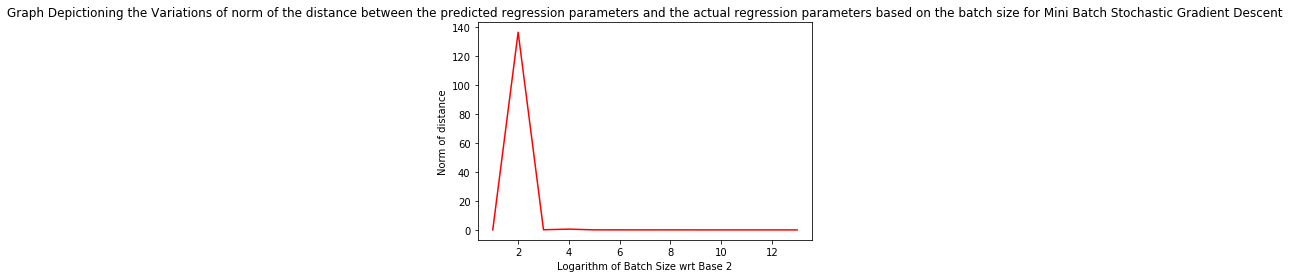

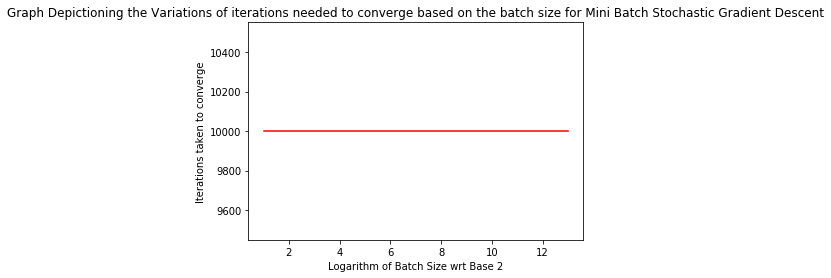

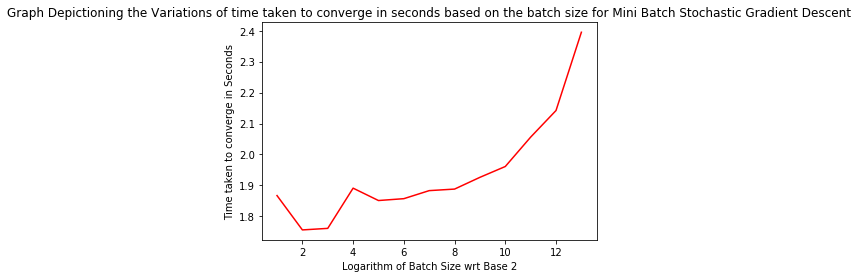

The optimal value for the batch size in mini batch gradient descent is 1024


In [212]:
X = 2.5 * np.random.randn(10000) + 1.5 #Generating the data
res = 1.5 * np.random.randn (10000)  # Some noise is generated so that the gradient cannot find the optimum at a very single step
y = 2 + 0.3 * X + res

optimal_batch_size_for_mgd = optimal_mini_batch_size(mini_batch_sgd, X, y)
print("The optimal value for the batch size in mini batch gradient descent is " + str (optimal_batch_size_for_mgd))

The optimal Batch Size for randomly initialized values from the Gaussian Distribution can be found as 1024 by the above given way. $\newline$
Here, we have plotted three graphs. $\newline$
The first graph depicts the variation of l2 norm of the difference between the predicted regression parameter value and the original regression parameter values while batch size is varied as a power of 2 and learning rate is kept constant. The first graph shows us that as we continiously increase the batch size the error of calculating the regression parameter continiopusly decreases as a larger batch size means we are considering more accurate gradient dierection instead of just approximating the gradient direction of a small sample as the gradient of the whole set. $\newline$
The second graph depicts the iteration taken to converge as in Mini Batch Gradient Descent the Gradients continiously oscillate near the optimum and never reaches accurately to the optima due to its nature of approximating the gradients of a subset of data set as the gradients of the whole data set, our algorithm never converges. So, it always run till the maximum allowed iterations i.e. 10,000 which is being depicted in the graph as a constant straight line parallel to X-axis. $\newline$
The time taken in seconds has always increases as the batch size has continiously increased because the time to calculate the gradients increase as the batch size increase while no of iterations are fixed which is being depicted as an approximately increasing function of batch size

### Calculating optimal Learning Rate for Mini Batch SGD

In [216]:
def optimal_learning_rate_mgd(mini_batch_sgd, X, y):
    
    #The function calculates the optimal mini batch size and return that and plot a graph of mini batch size wrt the performance
    
    n = X.size 
    
    list_iterations = []
    list_time = []
    list_distance = []
    
    min_distance = 8000
    optimal_learning_rate = 0
    init_ = np.array([-400, 1000])
    batch_size = 1024
    indices = np.array([-5, -4, -3,-2,-1,0,1,2,3])
    w_true = 0.3
    b_true = 2
    
    for i in range (9):
        
        learning_rate = float(10) ** float (indices[i])
        
        tic = time.process_time()
        (w,b, iterations) = mini_batch_sgd(X, y, init_, batch_size , learning_rate, n_iter = 10000, tol = 1e-6)
        toc = time.process_time()
        
        distance = (w_true - w) ** 2 + (b_true - b) ** 2
        
        list_iterations.append(iterations)
        list_time.append(np.round(toc - tic, 3))
        list_distance.append(distance)
        
        if distance < min_distance : 
            min_distance = distance
            optimal_learning_rate =float(10) ** float(indices[i])
            
    list_iterations = np.array(list_iterations)
    list_time = np.array(list_time)
    list_distance = np.array(list_distance)
    
    # plotting

    plt.title("Graph Depictioning the Variations of norm of the distance between the predicted regression parameters and the actual regression parameters based on the batch size for Mini Batch Stochastic Gradient Descent")
    plt.xlabel("Logarithm of learning rate wrt base 10")
    plt.ylabel("Norm of distance")
    plt.plot( indices, list_distance, color ="red")
    plt.show()

    plt.title("Graph Depictioning the Variations of number of iterations to converge the regression parameters based on the batch size for Mini Batch Stochastic Gradient Descent")
    plt.xlabel("Logarithm of learning rate wrt base 10")
    plt.ylabel("Iterations taken to converge")
    plt.plot(indices, list_iterations,  color ="red")
    plt.show()
    
    plt.title("Graph Depictioning the Variations of time taken to converge the regression parameters based on the batch size for Mini Batch Stochastic Gradient Descent")
    plt.xlabel("Logarithm of learning rate wrt base 10")
    plt.ylabel("Time taken to converge in Seconds")
    plt.plot( indices , list_time, color ="red")
    plt.show()
    
    return optimal_learning_rate

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in subtract
  import sys


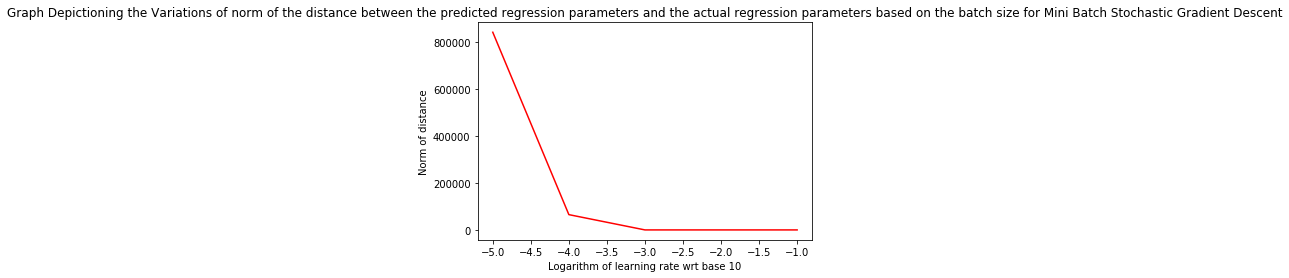

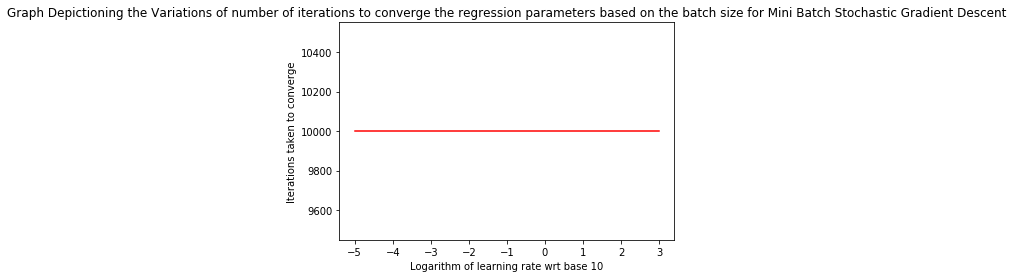

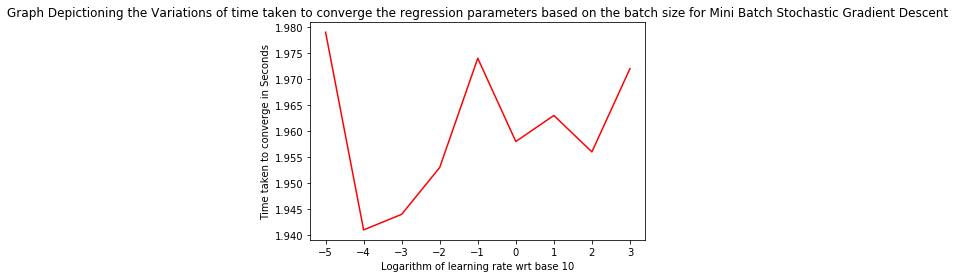

The Optimal Learning rate for the mini batch Stohastic Gradient DSescent is 0.001


In [217]:
#X = 2.5 * np.random.randn(10000) + 1.5 #Generating the data
#res = 1.5 * np.random.randn (10000)  # Some noise is generated so that the gradient cannot find the optimum at a very single step
#y = 2 + 0.3 * X + res

optimal_learning_rate_for_mgd = optimal_learning_rate_mgd(mini_batch_sgd, X, y)

print("The Optimal Learning rate for the mini batch Stohastic Gradient DSescent is " + str(optimal_learning_rate_for_mgd))

As for finding the optimal batch size, here is also three graphs being plotted. $\newline$
The first graph is the variation of the L2 norm of the difference between the actual regression parameter and the predicted regression parameter wrt logarithm of learning rate wrt base 10, while the batch size(=1024), the data set size, the number of maximum allowed iterations are constant. Note when the learning rate was too small, the distance was very high. After as the learning increases upto 0.1, the distance continiously decreases. And the graph says the optimal learning rate for our data set is 0.001. However, we have plotted only till 0.1 learning rate in that graph. $\newline$
The second graph depicts that the number of iteration is always constant while the learning rate is changed, because as we earlier discussed that the Mini Batch Gradient Descent never converges due to its oscillating natrure, now it may oscillate either very near to the optimal answer or a far away distance which is not quitely understandable from this graph.$\newline$
The graph depicts the time taklen to complete a fixed number of steps of 10,000 while varying the learning rate. However, trhis graph does not give any insight as the iteratioon number is always fixed. 

### Comparison between Mini Batch SGD and Gradient Descent w.r.t time taking and accuracy

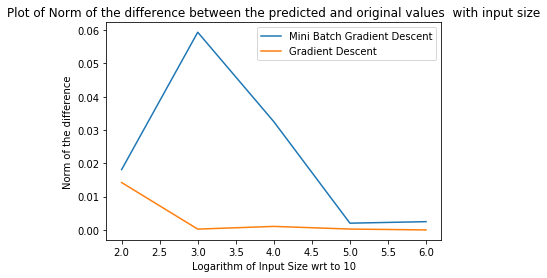

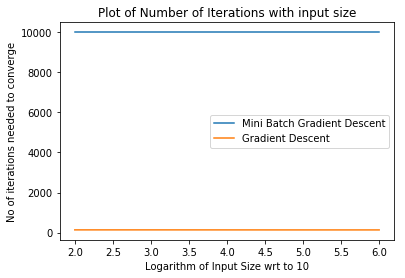

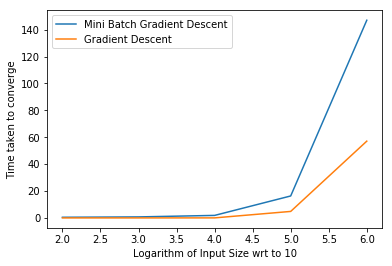

In [23]:
X = 2.5 * np.random.randn(10000) + 1.5 #Generating the data
res = 1.5 * np.random.randn (10000)  # Some noise is generated so that the gradient cannot find the optimum at a very single step
y = 2 + 0.3 * X + res

w_true = 0.3
b_true = 2
x_index = np.array([2,3,4,5,6]) 
no_of_iterations_sgd = []
no_of_iterations_mgd = []
time_sgd = []
time_mgd = []
distance_sgd = []
distance_mgd = []

for i in range (2, 7):
    
    n = 10 ** i 
    X = 2.5 * np.random.randn(n) + 1.5
    res = 1.5 * np.random.randn (n)  # Some noise is generated so that the gradient cannot find the optimum at a very single step
    y = 2 + 0.3 * X + res
    
    tic = time.process_time()
    (w1, b1, it1) = gradient_descent_regression ( X, y, init_=[-400, 600], learning_rate = 0.1, n_iter = 10000, tol = 1e-6 )
    toc = time.process_time()
    
    time_sgd.append(np.round(toc-tic, 3))
    no_of_iterations_sgd.append(it1)
    distance1 = (w1 - w_true)**2 + (b1 - b_true)**2   #L2 norm
    distance_sgd.append(distance1)
    
    tic = time.process_time()
    (w2, b2, it2) = mini_batch_sgd(X, y, init_ = [-400, 600], batch_size = 64, learning_rate = 0.1, n_iter = 10000, tol = 1e-6)
    toc = time.process_time()
    
    distance2 = (w2 - w_true)**2 + (b2 - b_true)**2
    time_mgd.append(np.round(toc-tic,3))
    no_of_iterations_mgd.append(it2)
    distance_mgd.append(distance2)
    
no_of_iterations_mgd = np.array(no_of_iterations_mgd)
no_of_iterations_sgd = np.array(no_of_iterations_sgd)
time_sgd = np.array(time_sgd)
time_mgd = np.array(time_mgd)
distance_sgd = np.array(distance_sgd)
distance_mgd = np.array(distance_mgd)

plt.title("Plot of Norm of the difference between the predicted and original values  with input size")
plt.plot(x_index, distance_mgd, label = 'Mini Batch Gradient Descent' )
plt.plot(x_index, distance_sgd, label = 'Gradient Descent')
plt.xlabel('Logarithm of Input Size wrt to 10')
plt.ylabel('Norm of the difference')
plt.legend()
plt.show()

plt.title("Plot of Number of Iterations with input size")
plt.plot(x_index, no_of_iterations_mgd, label = 'Mini Batch Gradient Descent' )
plt.plot(x_index, no_of_iterations_sgd, label = 'Gradient Descent')
plt.xlabel('Logarithm of Input Size wrt to 10')
plt.ylabel('No of iterations needed to converge')
plt.legend()
plt.show()
plt.plot(x_index, time_mgd, label = 'Mini Batch Gradient Descent' )
plt.plot(x_index, time_sgd, label = 'Gradient Descent')
plt.xlabel('Logarithm of Input Size wrt to 10')
plt.ylabel('Time taken to converge')
plt.legend()
plt.show()

Here three graph is pllotted to show the difference of behavious of Gradient Descent and Mini Batch Gradient Descent. $\newline$
The first graph is the norm of the difference between the actual regression parameter and the predicted regression parameter w.r.t the change in the Input Size while learning rate, data set is constant. The graph depicts that the Mini Batch Gradient Descent is performing worse while the number of dataser is small, but as the data set size increases its performance becomes close to the stochastic gradient descent. However, the Gradient Descent's performance was not good while the data size was small, but it improves when suffiecient data was supplied. $\newline$
The second graph shows how fast the Gradient Descent converges directly instead of continiously oscillating near the optimum in case of Mini Batch SGD. $\newline$
The third graph shows that the time taken to perform the Mini Batch SGD and the Normal Gradient Descent. However, the above trend is shown in that wrong way as the data set is not increased sufficiently due to the lack of computing resdources. If we get sufficient resources, we can see that the Mini Batch Stochastic would take less time compared to the Gradient descent as gradients need to be calculated on a smaller subset. However, the trend violates for small sample size as the mini batch SGD performs some more constant operation

# 2 ) Finding the Probability of a Bayesian Network

## 2 / i ) Probability of someone having both Cold and Fever

P( Cold $\bigcap $ Fever) = P ( Fever | Cold ) * P ( Cold ) [ As, the Cold and Fever are Mutually Dependent Random Variable] $\newline$
or, P( Cold $\bigcap $ Fever) = 0.307 * 0.02 = 0.00614 ( Answer ) $\newline$
Hence, the probability of someone having both a cold and a fever is 0.00614 according to our findings.

## 2 / ii ) Probability of  someone who has a cough has a cold

Here, we need to find the probability of P ( Cold | Cough ) from the given Bayesian Network. $\newline$ 
For this, we shall one by one calculate some probabilities, which will in turn help us to calculate the final probability. $\newline$

The aprior probability P(Lung Disease) can be calculated as the sum of two eevents as shown below because Lung Disease Random Variable is Dependent on the random variable Smoke. And smoke and non-smoke are two exclusive and exhaustive events.$\newline$
P(Lung Disease) = P(Lung Disease $\bigcap$ Smoke) + P(Lung Disease $\bigcap$ Not Smoke) $\newline$
or, P(Lung Disease) = P (Lung Disease | Smoke) * P (Smoke) + P( Lung Disease | Not Smoke) * P (Smoke) $\newline$
or, P (Lung disease ) = 0.1009 * 0.2 + 0.001 * 0.8 $\newline$
or, P ( Lung Disease ) = 0.02098 $\newline$

P(Cough | Cold) $\newline$
= P((Cough | Cold) | Lung Disease) * P ( Lung Disease ) + P ((Cough | Cold) | Not Lung Disease ) * P (Not Lung Disease)  [ Here, the random variable (Cough | Cold) is dependent on two exhaustive and mutually exclusive event of occuring or not occuring Lung Disease] $\newline$
= 0.7525 * 0.02098 + 0.505 * ( 1 - 0.02098) $\newline$
= 0.51019 
$\newline$
P(Cough $\bigcap$ Cold) $\newline$
    = P (Cough | Cold) * P ( Cold) [Here, Cough and Cold are two dependent random Variables] $\newline$
    = 0.51019 * 0.02 $\newline$
    = 0.01020
    $\newline$
Now the following Prior probability P (Cough) can be calculated as the sum of four mutually exclusive and exhaustive event as following $\newline$
P(Cough) $\newline$
    = P ( Cough $\bigcap$ Lung Disease $\bigcap$ Cold) + P( Cough $\bigcap$ Lung Disease $\bigcap$ Not Cold) 
      + P (Cough $\bigcap$ Not Lung Disease $\bigcap$ Cold) + P(Cough $\bigcap$ Not Lung Disease $\bigcap$ Not Cold)         $\newline$
    = P(Cough | (Lung Disease $\bigcap$ Cold) ) * P(Lung Disease $\bigcap$ Cold) + P( Cough | (Lung Disease $\bigcap$     Not Cold)) * P ( Lung Disease $\bigcap$ Not Cold) + P (Cough | (Not Lung Disease $\bigcap$ Cold) ) * P(Not Lung     Disease $\bigcap$ Cold) + P(Cough | (Not Lung Disease $\bigcap$ Not Cold)) * P( Not Lung Disease $\bigcap$ Not Cold) $\newline$
    = P(Cough | (Lung Disease $\bigcap$ Cold) ) * P (Lung Disease) * P (Cold) + P( Cough | (Lung Disease $\bigcap$     Not Cold)) * P(Lung Disease) * P(Not Cold) +  P (Cough | (Not Lung Disease $\bigcap$ Cold) ) * P(Not Lung Disease) * P(Cold) + P(Cough | (Not Lung Disease $\bigcap$ Not Cold)) * P(Not Lung Disease) * P(Not Cold) [As, Cold and Lung Disease are two independent Random Variable] $\newline$
    = 0.7525 * 0.02098 * 0.02 + 0.505 * 0.02098 * 0.98 + 0.505 * (1 - 0.02098) * 0.02 + 0.01 * (1 - 0.02098) * 0.98 $\newline$
    = 0.03018
     $\newline$
     
Now, the Apsosterior Probability P ( Cold | Cough ) can be calculated from the joint probability of Cough and Cold, and the Aprior Probability P (Cough) by applying Bayes' Rule as following : $\newline$
P(Cold | Cough) $\newline$
    = $ \frac{ P(Cough \bigcap Cold)}{P(Cough)} $ $\newline$
    = $ \frac{ 0.01020}{0.03018} $ [ P(Cough $\bigcap$ Cold) = 0.01020 and P(Cough) = 0.03018 from our earlier findings] $\newline$
    = 0.33797 ( Answer )
    $\newline$
    
Hence, the probability of someone having a Cold given that he has a Cough is 0.33797 according to our findings.


# 3 ) Finding the MLE estimate of Multinomial Distribution 


The Multinomial Distribution is generally an extension of Binomial Distribution(No of positive outcomes in n repetitive bernoulii experiment with only two possible outcome) which in turn is repetitive simple Bernoulii Distribution. $$\newline$$
Now we are describing the Multinomial Distribution. It can be defined as the probability distribution of the count of each of the outcomes in a specific number of times (say, n) repetitive experiment, where each experiments is having a fixed number (say, k ) possible outcomes. If k = 2, the multinomial distribution will be called as an Bernoulii Trial. $\newline$
Say we have ( k-1 ) random variables (say, $X_1, X_2, ..., X_{k-1}$) which will count the number of occurences of each of (k-1) outcomes out of k possible outcomes of n repetitive experiments and the $ X_k $ is a constant which will count the occurences of the k-th outcome and can be calculated as $ X_k = n - ( X_1 + X_2 + ... + X_{k-1})$
and the probability of each k - possible outcomes can be defined as $p_1, p_2, ..., p_k$, such that $p_1 + p_2 + ....+p_k = 1$ $\newline$
So, the probability of kobservasions of the k values can be defined as $ P( X_1 = x_1, X_2 = x_2, ..., X_k = x_k) = \frac{n!}{x_{1} !\ x_{2} !\ ....x_{k} !} \ p_{1}^{x_{1}} \ p_{2}^{x_{2}} ....p_{k}^{x}$ $\newline$
Now the Maximum Likelihood Estimation can be defined as finding the likelihood of the unknown parameter (i.e. $p_1,p_2,...p_k $), given the observations of the data (i.e., $x_1, x_2, ...x_k$ in the constrained environment of $p_1 + p_2 + ... + p_k = 1$. So the MLE estimation for Multinomial distribution is a constrained optimization problem.$\newline$
And the maximum log likelihood will be defined as the maximizing the log likelihood of the above in the same contrained. As logarithm is a monotonic function, it does not change the optimum value. $\newline$
$$ L\ ( \ p_{1} ,\ p_{2} ,\ ...,\ p_{k} \ |\ x_{1} ,\ x_{2} ,\ ...,\ x_{k}) = \frac{n!}{x_{1} !\ x_{2} !\ ....x_{k} !} \ p_{1}^{x_{1}} \ p_{2}^{x_{2}} ....p_{k}^{x} $$
Taking natural logarithm on both the side, 
$$or,\  \log( \ L\ ( \ p_{1} ,\ p_{2} ,\ ...,\ p_{k} \ |\ x_{1} ,\ x_{2} ,\ ...,\ x_{k}) \ ) \ =\ \log( n!) \ -\ \log( \ x_{1} !\ x_{2} !\ ...\ x_{k} !) \ +\ \sum _{i\ =\ 1}^{k} x_{i} \ \log p_{i}$$ $\newline$
From now on, we shall be writing the whole above log likelihood function as $LL$. Now we have to optimize the above log likelihood function w.r.t the probabilities of each outcomes given the observations subject to the contraints that $ \sum _{i\ =\ 1}^{k} p_{i} = 1 $ $\newline$
So, the above is a constrained optimization problem. We shall be using the Lagrangian Method to optimizing the above the Log likelihood fiunction. $\newline$
By applying the lagrangian, we can say that, we have to optimize the following log likelihood function, $\newline$

$$  Lagrangian_LL =\ \log( n!) \ -\ \log( \ x_{1} !\ x_{2} !\ ...\ x_{k} !) \ +\ \sum _{i\ =\ 1}^{k} x_{i} \ \log p_{i} \ + \alpha (1 - \sum_{i = 1}^{k} p_i)$$
Here, $\alpha > 0$ $\newline$
Now suppose I have to find the unknown parameter $p_i$ for i = 1,...k. With the lagrangian contraint, the above optimization is a closed form. So, we shall be taking partial derivatives w.r.t $p_i$ ( where, i = 1,2, ..., k) on both the sides and make it eaual to zero, which will give us the optimal value of the unknown parameter $p_i$, which would optimize the first log likelihood function. Note, here $p_i$ denotes the probability of the i-th random variable $X_i$, whose observed value is $x_i$
$$ or,\  \frac{\partial \ LagrangianLL}{\partial p_i} = \frac{x_i}{p_i}\ - \ \alpha $$ $\newline$
When $\frac{\partial \ LagrangianLL}{\partial p_i} = 0$, we get 
$$ p_i = \frac{x_i}{\alpha} $$
The double derivative of the above Lagrangian_LL would give a negative value while the i-th probability is positive. Hence, this i-th probability gives the maximum of the langrangian likelihood function.
Now, considering our constrained we find the constant non negative lagrangian constant as follows
$$
\sum_{i=1}^{k} p_i = 1 \newline
or, \ \sum_{i=1}^{k} \frac{x_i}{\alpha} = 1 \newline
or, \ \alpha = \sum_{i = 1}^{k} x_i \newline
or, \ \alpha = n \ \ [\because \sum_{i = 1}^{k} x_i = n]
$$
Hence, our final answer would be $p_i = \frac{x_i}{n} \ \  \forall i = 1 \ to \  k$.
The above is the Maximum Likelihood Estimated values of the unknown parameters of Multinomial Distribution.
